In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [20]:
# Define the two-layer MLP model
class MLP(nn.Module):
    def __init__(self, hidden_size=50):
        super(MLP, self).__init__()
        # First layer: input to hidden
        self.fc1 = nn.Linear(1, hidden_size)
        # Second layer: hidden to output
        self.fc2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x

In [21]:
# Create the dataset: x values and corresponding sin(x)
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [28]:
# Initialize model, loss function, and optimizer
model = MLP(hidden_size=50)
criterion = nn.MSELoss()

# optimizer = optim.Adam(model.parameters(), lr=0.01)
import opts.adap_newton_cg
optimizer = opts.adap_newton_cg.AdapNewtonCG(model.parameters())

In [30]:
# Train the model
epochs = 1000
for epoch in tqdm.tqdm(range(epochs)):
    model.train()
    # optimizer.zero_grad()
    
    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        grad_tuple = torch.autograd.grad(loss, model.parameters(), create_graph=True)
        return loss, grad_tuple
    
    # Forward pass
    # outputs = model(x_tensor)
    # loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    # loss.backward()
    
    loss, g = optimizer.step(closure=closure)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

[autoreload of opts.adap_newton_cg failed: Traceback (most recent call last):
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/data/working/opt_for_pinns/env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 309, in up

NameError: name '_nystrom_pcg' is not defined

In [24]:
# Evaluate and plot the results
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()

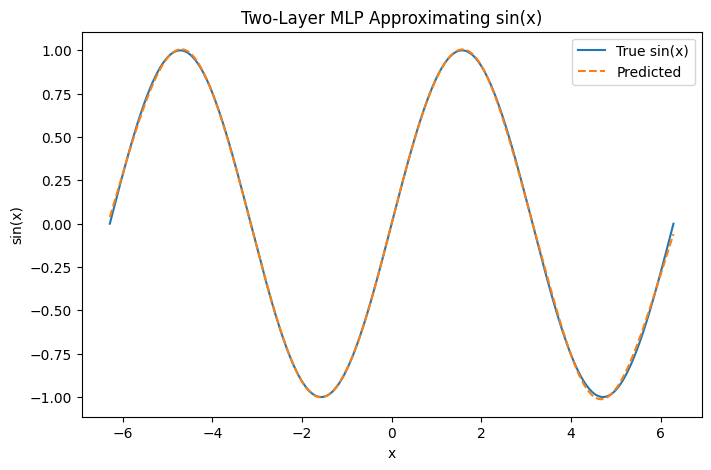

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='True sin(x)')
plt.plot(x, predictions, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Two-Layer MLP Approximating sin(x)")
plt.show()